# Финальная работа курса "Введенение в Data Science". Специалтзация Data Analyst
## Анализ данных клиентских сессий сервиса "СберАвтоподписка"


## Что нужно сделать:
### Изучить предоставленные данные
### Провести подготовительную работу
### Провести разведочный анализ данных
### Выполнить проверку следующих гипотез:
#### Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события
#### Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события
#### Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события
### Дать ответы на вопросы продуктовой команды:
#### Из каких источников / кампаний(рекламных) / устройств / локаций идет самый целевой трафик (и с точки зрения объема и с точки зрения CR)?
#### Какие авто пользуются наибольшим спросом? У каких авто самый лучший покакзатель CR в целевые события?
#### Стоит ли увеличивать присутствие в социальных сетях и давать там больше рекламы?


## План работы:
Знакомство с данными:
> Загрузить файлы с данными
> Использовать функцию df_info для получения общей информации о данных и оценки пропущенных значений.
Очистка данных:
> Удалить колонки с пропусками > 30%
> Заполнить пропуски в колонках в которых количество пропусков < 30%
> Удалить колонки, которые не представляют интереса для анализа.
Генерация дополнительных фичей:
> Создать целевую переменную target на основе значений в столбце event_action.
> Создать колонку traffic, указывающего, является ли трафик органическим или платным.
> Извлечь марку и модель автомобиля из колонки hit_page_path и добавить соответствующие колонки марка и модель в набор данных.
> Объеденить датасеты для дальнейшего анализа
Анализ ключевых показателей, проверка гипотез(Статистический критерий и тест, текстовая интерпретация результата), ответы на вопросы бизнеса:
> Рассмотреть долю трафика из разных источников.
> Оценить Conversion Rate для различных типов устройств.
> Оценить Conversion Rate для различных групп трафика.
> Оценить Conversion Rate для городов присутствия и других регионов.
> Определить наиболее популярные источники, кампании, устройства и локации.
> Определить авто с наибольшим спросом и авто с лучшим показателем Conversion Rate.
> Определить, стоит ли увеличивать присутствие в социальных сетях и увеличивать рекламный бюджет для них.


## Знакомство с данными

In [60]:
# Импорттрую необходиме библиотеки и модули
import pandas as pd
import missingno as msno
from datetime import datetime
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
# Прочитаю предоставленные файлы
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10176\789913601.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [3]:

df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [16]:
# Выведу период предоставления данных
print(f'В датасете df_hits собраны события в рамках одного визита за период с {df_hits.hit_date.min()} по  {df_hits.hit_date.max()}') 
print(f'В датасете df_sessions собраны события в рамках одного визита за период с {df_sessions.visit_date.min()} по  {df_sessions.visit_date.max()}')


В датасете df_hits собраны события в рамках одного визита за период с 2021-05-19 00:00:00 по  2021-12-31 00:00:00
В датасете df_sessions собраны события в рамках одного визита за период с 2021-05-19 00:00:00 по  2021-12-31 00:00:00


In [18]:
# выведу информацию о размерности файлов
print(f'Размер датасета df_hits: {df_hits.shape}, \nРазмер датасета df_sessions: {df_sessions.shape}')


Размер датасета df_hits: (15726470, 11), 
Размер датасета df_sessions: (1860042, 18)


In [9]:
# Выведу информацию о данных и проверю на пропуски
def df_info(data):

    print('----------------------------------------')

    print(data.info())

    print('----------------------------------------')

    display(pd.DataFrame(round((data.isna().mean()*100))).style.background_gradient('coolwarm'))

    print('----------------------------------------')

In [10]:
df_info(df_hits)

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB
None
----------------------------------------


,0
session_id,0.000000
hit_date,0.000000
hit_time,58.000000
hit_number,0.000000
hit_type,0.000000
hit_referer,40.000000
hit_page_path,0.000000
event_category,0.000000
event_action,0.000000
event_label,24.000000


----------------------------------------


In [13]:
df_info(df_sessions)

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB
None
----------------------------

,0
session_id,0.000000
client_id,0.000000
visit_date,0.000000
visit_time,0.000000
visit_number,0.000000
utm_source,0.000000
utm_medium,0.000000
utm_campaign,12.000000
utm_adcontent,18.000000
utm_keyword,58.000000


----------------------------------------


Матрица пропусков для df_hits


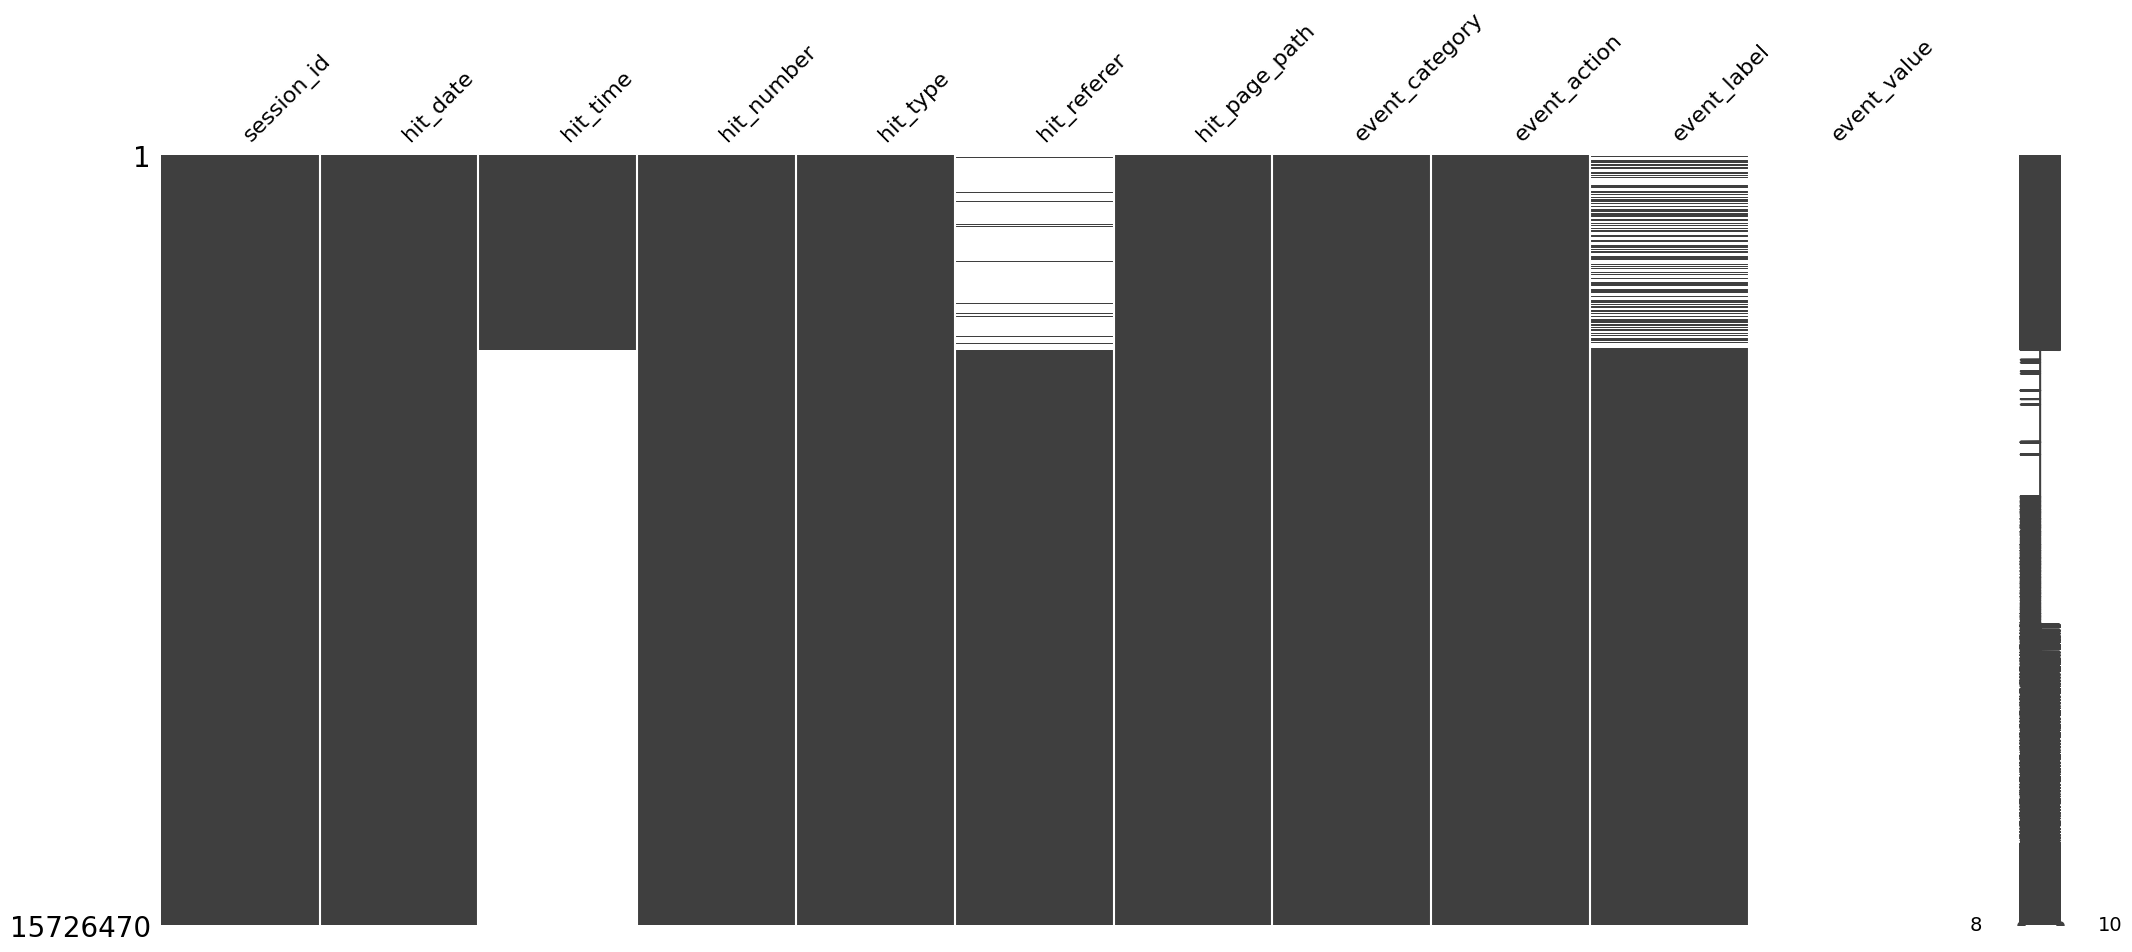

In [19]:
# Визуализирую пропуски в данных
print('Матрица пропусков для df_hits')
msno.matrix(df_hits);

Матрица пропусков для df_sessions


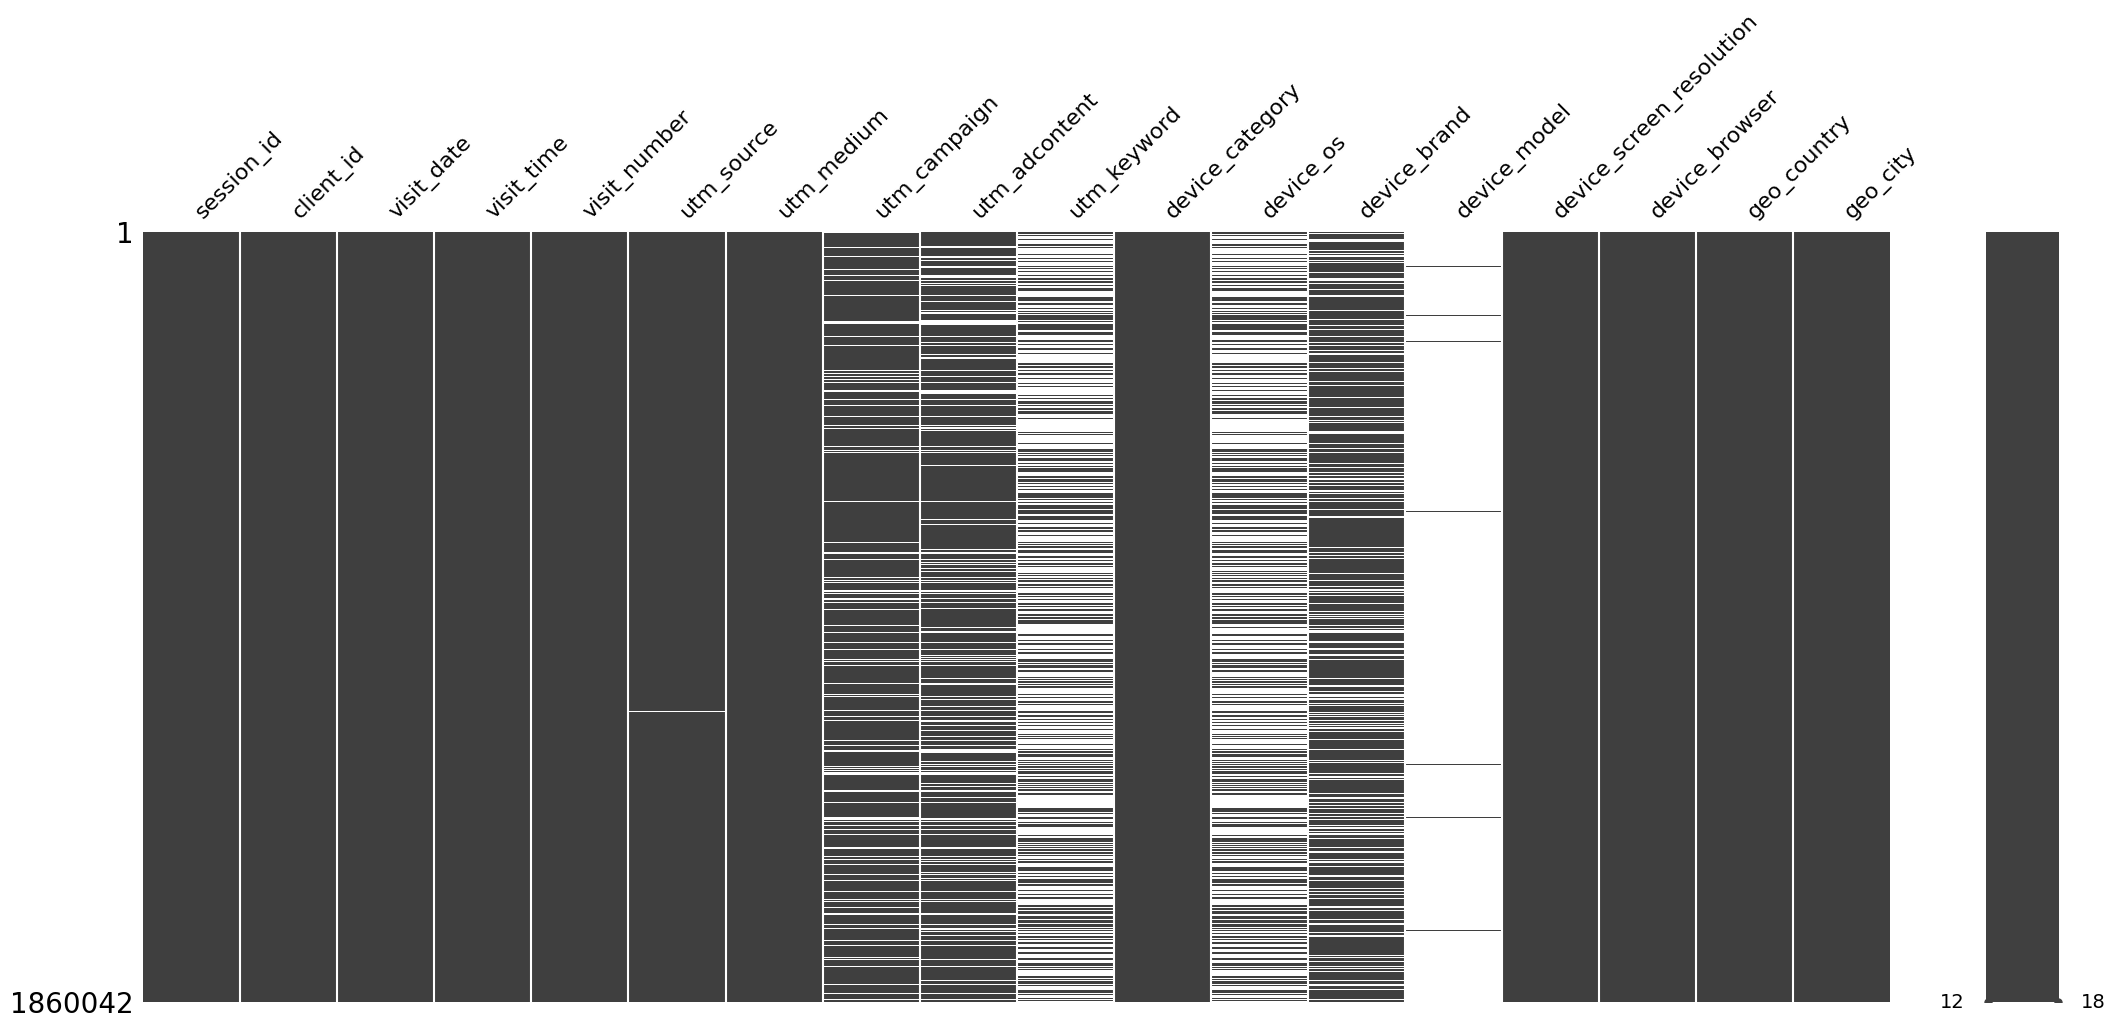

In [20]:
print('Матрица пропусков для df_sessions')
msno.matrix(df_sessions);

In [ ]:
# Проверю данные на дубликаты
print(f'Количество дубликатов в df_sessions: {df_sessions.duplicated().sum()}') 
print(f'Количество дубликатов в df_hits: {df_hits.duplicated().sum()}')  

## Предобработка данных

In [14]:
# Изменю тип данных в колонках hit_time, hit_date, visit_date, visit_time на datetime64[ns]
df_hits[['hit_date', 'hit_time']] = df_hits[['hit_date', 'hit_time']].astype('datetime64[ns]')
df_sessions[['visit_date', 'visit_time']] = df_sessions[['visit_date', 'visit_time']].astype('datetime64[ns]')

In [21]:
# удалю колонки в которых более 30% пропусков
df_sessions = df_sessions.drop(['utm_keyword', 'device_model', 'device_os'], axis=1)
df_sessions.shape

(1860042, 15)

In [22]:
df_hits = df_hits.drop(['event_value', 'hit_time', 'hit_referer'], axis=1)
df_hits.shape

(15726470, 8)

In [16]:
# Заполнню пропуски в df_sessions
# Колонку device_brand заполню значением 'other'
# Колонки utm_adcontent, utm_campaign и utm_source модой
df_sessions.device_brand = df_sessions.device_brand.fillna('other')
df_sessions['utm_campaign'].fillna(df_sessions['utm_campaign'].mode()[0], inplace=True)
df_sessions['utm_adcontent'].fillna(df_sessions['utm_adcontent'].mode()[0], inplace=True)
df_sessions['utm_source'].fillna(df_sessions['utm_source'].mode()[0], inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_7992\2775890495.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sessions['utm_campaign'].fillna(df_sessions['utm_campaign'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_7992\2775890495.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [17]:
# в df_hits колонку event_label заполню значением 'other'
df_hits.event_label = df_hits.event_label.fillna('other')

In [18]:
# Снова выведу процент пропущенных значений. пропусков нет
missing_values_sessions1 = ((df_sessions.isna().sum() / len(df_sessions)) * 100).sort_values(ascending = False)
print('Процент пропущенных значений в датасете df_sessions:\n', missing_values_sessions1)

Процент пропущенных значений в датасете df_sessions:
 session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64


In [19]:
missing_hits1 = ((df_hits.isna().sum() / len(df_hits)) * 100).sort_values(ascending = False)
print('Процент пропущенных значений в датасете df_hits:\n', missing_hits1)

Процент пропущенных значений в датасете df_hits:
 session_id        0.0
hit_date          0.0
hit_number        0.0
hit_type          0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
event_label       0.0
dtype: float64


## Генерация дополнительных фичей. Объединение датафреймов

In [23]:
# Целевое действие находится в датасете df_hits. Выведу количество уникальных значений
df_hits['event_action'].nunique()

230

In [25]:
# Выведу, количество целевых действий и их долю в общем количестве действий
all_targets = ['sub_car_claim_click',

'sub_car_claim_submit_click',

'sub_open_dialog_click',

'sub_custom_question_submit_click',

'sub_call_number_click',

'sub_callback_submit_click',

'sub_submit_success',

'sub_car_request_submit_click']



In [26]:
sorted_all_targets = []
total = 0
i = 0
labels, data = [], []

for targets_name in all_targets:
    
    value = len(df_hits[df_hits['event_action'] == targets_name])
    percent = round(value/len(df_hits)*100, 2)
    sorted_all_targets.append((targets_name, value, percent))
    
    total += value
    
    i += 1
    
sorted_all_targets = sorted(sorted_all_targets, key=lambda sorted_all_targets: sorted_all_targets[1],  reverse=True)
print(f'\n\nВсего целевых действий = {total} из {len(df_hits)} что составляет {total/len(df_hits)*100: .2f} %\n')
for target in sorted_all_targets:
    data.append(target[1])
    labels.append(target)
    print(target[0], '=', target[1], '===', target[2], '%') 



Всего целевых действий = 104908 из 15726470 что составляет  0.67 %

sub_car_claim_click = 37928 === 0.24 %
sub_open_dialog_click = 25870 === 0.16 %
sub_submit_success = 18439 === 0.12 %
sub_car_claim_submit_click = 12359 === 0.08 %
sub_call_number_click = 3653 === 0.02 %
sub_callback_submit_click = 3074 === 0.02 %
sub_car_request_submit_click = 2966 === 0.02 %
sub_custom_question_submit_click = 619 === 0.0 %


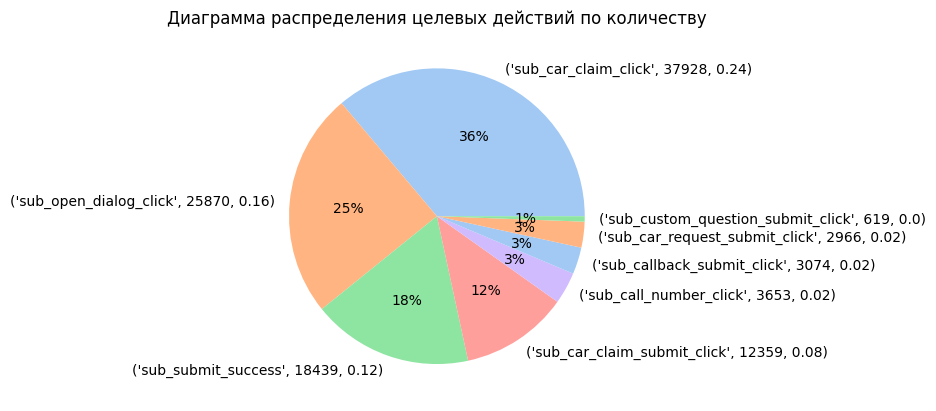

In [27]:
# Визуализирую распределение целевых действий по количеству
colors = sns.color_palette('pastel')[ 0:5 ]


plt.title("Диаграмма распределения целевых действий по количеству")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [28]:
# Создам целевую переменную 'target', которая содержит информацию о том, совершил ли клиент целевое действие
# 1 - если действие совершено, 0 - если нет
df_hits['target'] = df_hits['event_action'].apply(lambda x: 1 if x in all_targets else 0)

In [29]:
# Извлеку информацию о марке и модели автомобилей предоставляемых сервисом
df_hits['car_brand'] = df_hits.hit_page_path.apply(lambda x:x.split('/')[3] if 'all' in x.split('/') else 'other')
df_hits['cars_model'] = df_hits.hit_page_path.apply(lambda x:x.split('/')[4] if 'all' in x.split('/') else 'other')

In [30]:
# Объединю данные в один датасет
df_all = pd.merge(left=df_hits.groupby('session_id')[['target', 'car_brand', 'cars_model']].max(), right=df_sessions, on='session_id', how='left')

In [31]:
df_all.head()


,session_id,target,car_brand,cars_model,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,0,other,other,232832813.163266,2021-09-26,2024-05-21 16:00:00,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,412x869,Chrome,Russia,Gelendzhik
1,1000010177899156286.1635013443.1635013443,0,other,other,232833013.163501,2021-10-23,2024-05-21 21:24:03,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x640,Samsung Internet,Russia,Voronezh
2,1000013386240115915.1635402956.1635402956,0,other,vesta,232833760.16354,2021-10-28,2024-05-21 09:35:56,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x846,Chrome,Russia,Cherkessk
3,1000017303238376207.1623489300.1623489300,0,other,other,232834672.162349,2021-06-12,2024-05-21 12:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x780,Chrome,Russia,Irkutsk
4,1000020580299877109.1624943350.1624943350,0,other,other,232835435.162494,2021-06-29,2024-05-21 08:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow


In [32]:
print(f'Размер объединенного датасета: {df_all.shape}')


Размер объединенного датасета: (1734610, 18)


In [33]:
# Выведу информацию об объединенном датасете
df_info(df_all)

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734610 entries, 0 to 1734609
Data columns (total 18 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   target                    int64         
 2   car_brand                 object        
 3   cars_model                object        
 4   client_id                 object        
 5   visit_date                datetime64[ns]
 6   visit_time                datetime64[ns]
 7   visit_number              float64       
 8   utm_source                object        
 9   utm_medium                object        
 10  utm_campaign              object        
 11  utm_adcontent             object        
 12  device_category           object        
 13  device_brand              object        
 14  device_screen_resolution  object        
 15  device_browser            object        
 16  geo_country  

,0
session_id,0.000000
target,0.000000
car_brand,0.000000
cars_model,0.000000
client_id,0.000000
visit_date,0.000000
visit_time,0.000000
visit_number,0.000000
utm_source,0.000000
utm_medium,0.000000


----------------------------------------


In [37]:
# Заполню пропуски значением 'other' и снова выведу информацию, чтобы убедиться что пропусков в данных нет
df_all.device_brand = df_all.device_brand.fillna('other')
df_all.utm_adcontent = df_all.utm_adcontent.fillna('other')
df_all.utm_campaign = df_all.utm_campaign.fillna('other')

In [38]:
df_info(df_all)

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734610 entries, 0 to 1734609
Data columns (total 18 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   target                    int64         
 2   car_brand                 object        
 3   cars_model                object        
 4   client_id                 object        
 5   visit_date                datetime64[ns]
 6   visit_time                datetime64[ns]
 7   visit_number              float64       
 8   utm_source                object        
 9   utm_medium                object        
 10  utm_campaign              object        
 11  utm_adcontent             object        
 12  device_category           object        
 13  device_brand              object        
 14  device_screen_resolution  object        
 15  device_browser            object        
 16  geo_country  

,0
session_id,0.000000
target,0.000000
car_brand,0.000000
cars_model,0.000000
client_id,0.000000
visit_date,0.000000
visit_time,0.000000
visit_number,0.000000
utm_source,0.000000
utm_medium,0.000000


----------------------------------------


In [32]:
# Сохраню новый датасет, далее работать буду с ним
df_all.to_csv('df_all.csv')

In [33]:
df_all = pd.read_csv('df_all.csv')
df_all.head()

,Unnamed: 0,session_id,target,car_brand,cars_model,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,0,1000009318903347362.1632663668.1632663668,0,other,other,2.328328e+08,2021-09-26,2024-05-21 16:00:00,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,412x869,Chrome,Russia,Gelendzhik
1,1,1000010177899156286.1635013443.1635013443,0,other,other,2.328330e+08,2021-10-23,2024-05-21 21:24:03,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x640,Samsung Internet,Russia,Voronezh
2,2,1000013386240115915.1635402956.1635402956,0,other,vesta,2.328338e+08,2021-10-28,2024-05-21 09:35:56,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x846,Chrome,Russia,Cherkessk
3,3,1000017303238376207.1623489300.1623489300,0,other,other,2.328347e+08,2021-06-12,2024-05-21 12:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x780,Chrome,Russia,Irkutsk
4,4,1000020580299877109.1624943350.1624943350,0,other,other,2.328354e+08,2021-06-29,2024-05-21 08:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow


## Анализ ключевых показателей, проверка гипотез

### Гипотеза 1: 
### Нулевая гипотеза: "Органический трафик не отличается от платного с точки зрения CR в целевые события"
### Альтернативная гипотеза: Органический трафик ОТЛИЧАЕТСЯ от платного с точки зрения CR в целевые события.


In [39]:
# Создам новый признак "trafic", в котором укажу является ли трафик органическим или нет
organic_trafic = ['organic', 'referral', '(none)']
df_all['trafic'] = df_all.apply(lambda x: 'organic' if x.utm_medium in organic_trafic else 'other', axis =1)

In [40]:
df_all.head()

,session_id,target,car_brand,cars_model,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,trafic
0,1000009318903347362.1632663668.1632663668,0,other,other,232832813.163266,2021-09-26,2024-05-21 16:00:00,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,412x869,Chrome,Russia,Gelendzhik,other
1,1000010177899156286.1635013443.1635013443,0,other,other,232833013.163501,2021-10-23,2024-05-21 21:24:03,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x640,Samsung Internet,Russia,Voronezh,organic
2,1000013386240115915.1635402956.1635402956,0,other,vesta,232833760.16354,2021-10-28,2024-05-21 09:35:56,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x846,Chrome,Russia,Cherkessk,other
3,1000017303238376207.1623489300.1623489300,0,other,other,232834672.162349,2021-06-12,2024-05-21 12:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x780,Chrome,Russia,Irkutsk,other
4,1000020580299877109.1624943350.1624943350,0,other,other,232835435.162494,2021-06-29,2024-05-21 08:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow,organic


In [41]:
#выведу процент распределения целевой переменной
def as_percent(x: float) -> str:
        
    return f'{x:0.2%}'

print('Распределение целевой переменной:')
df_all["target"].value_counts(dropna=False, normalize=True).apply(as_percent)

Распределение целевой переменной:


target
0    97.07%
1     2.93%
Name: proportion, dtype: object

In [42]:
# функция для подсчета конверсии
def target_percentage(
    data: pd.DataFrame, 
    column: str, 
    index_name: str = '',
    only_target: bool = False, 
    sort: bool = True, 
    percent: bool = True 
):  

    # названия колонок
    count = 'Количество объектов'
    ratio = 'Доля от общего числа в %'
    target = 'CR'

    # разбиение по значениям
    groupby = data.groupby(column)
    
    # расчёт количества объектов и доли целевых действий
    result = pd.DataFrame(index=groupby.groups)
    result[count] = groupby[column].count()
    result[ratio] = result[count] / len(data)
    result[target] = groupby['target'].sum() / result[count]
    
    # форматирование выходной таблицы
    result.index.name = index_name or column
    if sort: result = result.sort_values(target, ascending=False)
    if percent: 
        result[target] = result[target].apply(as_percent)
        result[ratio] = result[ratio].apply(as_percent)
    
    # возвращение результатов
    if only_target: 
        return result[target].rename('target_percentage')
    return result

In [43]:
# Распределение трафика в %
df_all["trafic"].value_counts(dropna=False, normalize=True).apply(as_percent)

trafic
other      72.97%
organic    27.03%
Name: proportion, dtype: object

In [44]:
print('Количество целевых действий по трафику')
trafic = df_all.groupby(['trafic'], as_index=False).agg({'target': 'mean'})
trafic = trafic.rename(columns={'target': 'CR'})
trafic

Количество целевых действий по трафику


,trafic,CR
0,organic,0.044383
1,other,0.023661


In [45]:
# Выведу процент CR 
print('Процент целевых действий по трафику: ')
target_percentage(df_all, 'trafic')

Процент целевых действий по трафику: 


,Количество объектов,Доля от общего числа в %,CR
trafic,,,
organic,468920,27.03%,4.44%
other,1265690,72.97%,2.37%


In [46]:
# Разделю троафик на Органический и платный 
org = df_all.loc[df_all['trafic'] == 'organic']
paid = df_all.loc[df_all['trafic'] == 'other']


In [42]:
org

,Unnamed: 0,session_id,target,car_brand,cars_model,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,trafic
1,1,1000010177899156286.1635013443.1635013443,0,other,other,2.328330e+08,2021-10-23,2024-05-21 21:24:03,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x640,Samsung Internet,Russia,Voronezh,organic
4,4,1000020580299877109.1624943350.1624943350,0,other,other,2.328354e+08,2021-06-29,2024-05-21 08:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow,organic
5,5,1000020580299877109.1624980453.1624980453,0,other,other,2.328354e+08,2021-06-29,2024-05-21 18:00:00,3.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow,organic
10,10,1000043953525145011.1638186424.1638186424,0,volkswagen,rapid,2.328409e+08,2021-11-29,2024-05-21 14:47:04,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,YaBrowser,Russia,Moscow,organic
25,25,1000102382243923716.1621870341.1621870341,0,other,other,2.328545e+08,2021-05-24,2024-05-21 18:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Krasnoyarsk,organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732240,1734584,999819477043134339.1621901188.1621901188,1,other,other,2.327886e+08,2021-05-25,2024-05-21 03:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,organic
1732241,1734585,999819477043134339.1621939276.1621939291,0,other,other,2.327886e+08,2021-05-25,2024-05-21 13:00:00,2.0,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,organic
1732246,1734590,999869912844216646.1622026578.1622026578,0,other,other,2.328004e+08,2021-05-26,2024-05-21 13:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x915,Chrome,Russia,Moscow,organic
1732247,1734591,999869912844216646.1622030933.1622030933,1,other,other,2.328004e+08,2021-05-26,2024-05-21 15:00:00,2.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x915,Chrome,Russia,Moscow,organic


In [43]:
paid

,Unnamed: 0,session_id,target,car_brand,cars_model,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,trafic
0,0,1000009318903347362.1632663668.1632663668,0,other,other,2.328328e+08,2021-09-26,2024-05-21 16:00:00,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,412x869,Chrome,Russia,Gelendzhik,other
2,2,1000013386240115915.1635402956.1635402956,0,other,vesta,2.328338e+08,2021-10-28,2024-05-21 09:35:56,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x846,Chrome,Russia,Cherkessk,other
3,3,1000017303238376207.1623489300.1623489300,0,other,other,2.328347e+08,2021-06-12,2024-05-21 12:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x780,Chrome,Russia,Irkutsk,other
6,6,1000027718532820202.1622240490.1622240490,0,other,other,2.328371e+08,2021-05-29,2024-05-21 01:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Safari,Russia,Moscow,other
7,7,1000027718532820202.1622291029.1622291029,0,other,other,2.328371e+08,2021-05-29,2024-05-21 15:00:00,2.0,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Safari,Russia,Moscow,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,1734605,999960188766601545.1626816843.1626816843,0,other,other,2.328214e+08,2021-07-21,2024-05-21 00:00:00,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,dUuXlWzvmhDSyclWRhNP,mobile,Huawei,360x780,Chrome,Russia,Moscow,other
1732262,1734606,99996598443387715.1626811203.1626811203,0,other,other,2.328227e+07,2021-07-20,2024-05-21 23:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Saint Petersburg,other
1732263,1734607,999966717128502952.1638428330.1638428330,0,other,other,2.328229e+08,2021-12-02,2024-05-21 09:58:50,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Xiaomi,393x873,Chrome,Russia,Nizhny Novgorod,other
1732264,1734608,999988617151873171.1623556243.1623556243,0,other,other,2.328280e+08,2021-06-13,2024-05-21 06:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x732,Samsung Internet,Russia,Chelyabinsk,other


In [47]:
# Посчитаю конверсию по visit_date отдельно для органического и платного трафиков
org_count = org.groupby('visit_date', as_index=False)['target'].count()
org_sum = org.groupby('visit_date', as_index=False)['target'].sum()
org_all = org_sum.merge(org_count, on='visit_date')
org_all['CR'] = org_all['target_x']/org_all['target_y'] * 100
org_all




,visit_date,target_x,target_y,CR
0,2021-05-19,50,697,7.173601
1,2021-05-21,0,805,0.000000
2,2021-05-22,10,693,1.443001
3,2021-05-23,40,873,4.581901
4,2021-05-24,2524,38834,6.499459
...,...,...,...,...
221,2021-12-27,38,2349,1.617710
222,2021-12-28,24,1961,1.223865
223,2021-12-29,27,1465,1.843003
224,2021-12-30,18,1107,1.626016


In [48]:
paid_count = paid.groupby('visit_date', as_index=False)['target'].count()
paid_sum = paid.groupby('visit_date', as_index=False)['target'].sum()
paid_all = paid_sum.merge(paid_count, on='visit_date')
paid_all['CR'] = paid_all['target_x']/paid_all['target_y'] * 100
paid_all



,visit_date,target_x,target_y,CR
0,2021-05-19,0,6,0.000000
1,2021-05-21,0,21,0.000000
2,2021-05-22,1,68,1.470588
3,2021-05-23,6,236,2.542373
4,2021-05-24,12,396,3.030303
...,...,...,...,...
221,2021-12-27,195,8807,2.214148
222,2021-12-28,215,9812,2.191194
223,2021-12-29,192,10891,1.762924
224,2021-12-30,152,11191,1.358234


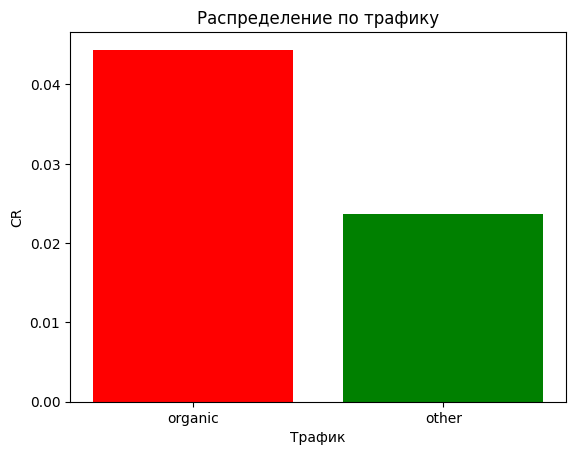

In [49]:
plt.bar(trafic['trafic'], trafic['CR'], color=['red', 'green'])
plt.title('Распределение по трафику')
plt.xlabel('Трафик')
plt.ylabel('СR');

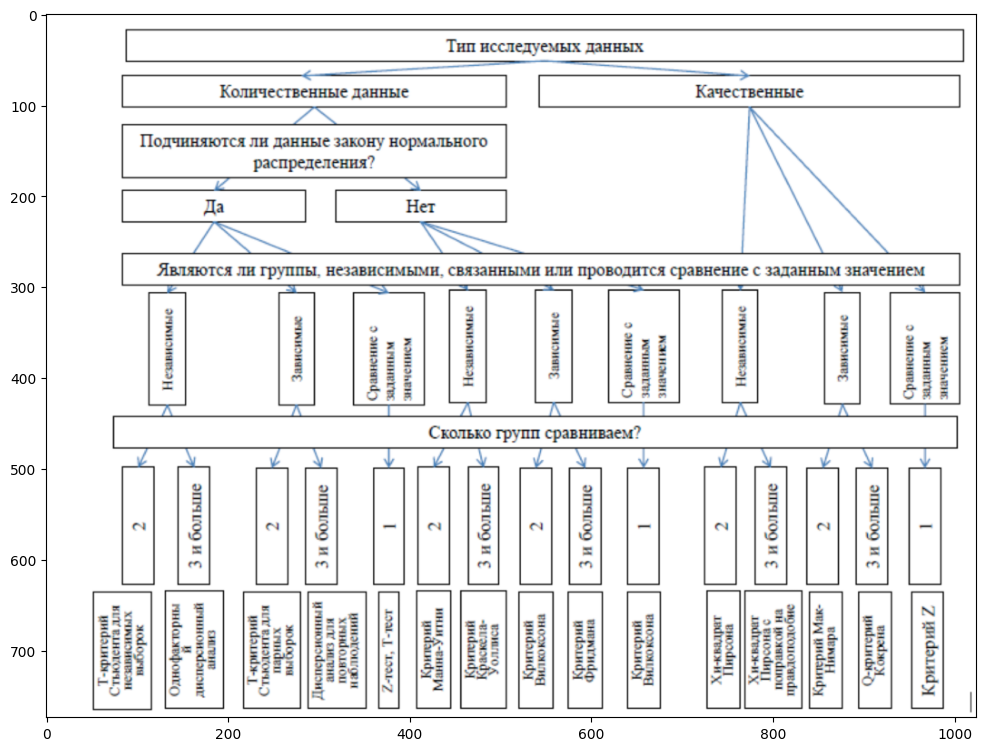

In [71]:
# Создам напоминалку по выбору статистического критерия
plt.figure(figsize=(12, 14))
img = plt.imread('стат критерии.png')
plt.imshow(img)
plt.show();

### P-value – это минимальный уровень значимости, на котором нулевая гипотеза может быть отвергнута.  
### Соответственно, если p − value меньше нашего фиксированного уровня значимости, на котором мы проверяем гипотезу,
### то нулевую гипотезу следует отвергнуть, если более – то отвергать нулевую гипотезу оснований нет.

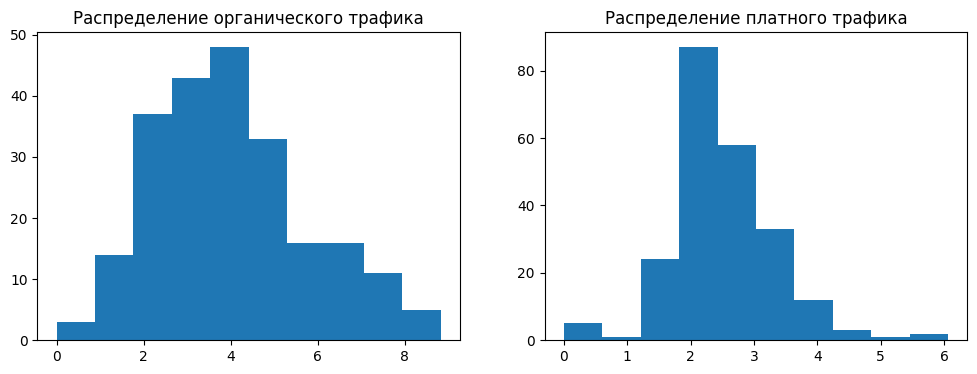

In [72]:
# Визуально видно различие органического и платного трафиков. Проверю при помощи статистических тестов
# т.к. сравниваются количественные данные (CR) проверю подчиняются ли данный закону нормального распределения
# визуализация распределения данных
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
axes[0].hist(org_all.CR) 
axes[1].hist(paid_all.CR)
axes[0].set_title('Распределение органического трафика')
axes[1].set_title('Распределение платного трафика');

In [73]:
# Проверка распределения данных при помощи теста Шапиро-Уилка (Нулевая гипотеза: Величина CR распределена нормально)
stats.shapiro(org_all.CR)

ShapiroResult(statistic=0.9760785433216848, pvalue=0.0007058685302841293)

In [74]:
stats.shapiro(paid_all.CR)

ShapiroResult(statistic=0.9524449094433939, pvalue=8.638586547951599e-07)

### т.к. pvalue в обоих случаях не превышает 5% следовательно гипотезу о том, что величина подчиняется закону нормального распределения нужно отвергнуть.
### выборки являются не зависимыми, т.к. сравниваются две разные группы пользователей.
### колличество групп - 2.
### следовательно для проверки гирпотезы нужно применить Критерий Манна-Уитни

In [75]:
# Применяю Критерий Манна-Уитни
stats.mannwhitneyu(org_all.CR, paid_all.CR)

MannwhitneyuResult(statistic=39636.5, pvalue=3.2161570142536417e-24)

### т.к. pvalue=3.2161570142536417e-24, то есть не превышает 5%, нельзя подтвердить нулевую гипотезу.
### принимаю альтернативную гипотезу: "Органический трафик ОТЛИЧАЕТСЯ от платного с точки зрения CR в целевые события"

### Гипотеза 2 
### Нулевая гипотеза: "Трафик с мобильных устройств не отличается от трафика с десктопных устройств c точки зрения CR в целевые события"
### Альтернативная гипотеза: "Трафик с мобильных устройств ОТЛИЧАЕТСЯ от трафика с десктопных устройств c точки зрения CR в целевые события"

In [76]:
# Всего категорий 3. Выведу количество значений по каждой категории
df_all.device_category.value_counts()


device_category
mobile     1368679
desktop     346891
tablet       16696
Name: count, dtype: int64

In [77]:
# Выведу количество целевых действий
print('Количество целевых действий по категориям устройств')
device = df_all.groupby(['device_category'], as_index=False).agg({'target': 'mean'})
device = device.rename(columns={'target': 'CR'})
device

Количество целевых действий по категориям устройств


,device_category,CR
0,desktop,0.033189
1,mobile,0.028041
2,tablet,0.025276


In [78]:
# Выведу процент CR 
print('Процент целевых действий по категориям устройств: ')
target_percentage(df_all, 'device_category')

Процент целевых действий по категориям устройств: 


,Количество объектов,Доля от общего числа в %,CR
device_category,,,
desktop,346891,20.00%,3.32%
mobile,1368679,78.90%,2.80%
tablet,16696,0.96%,2.53%


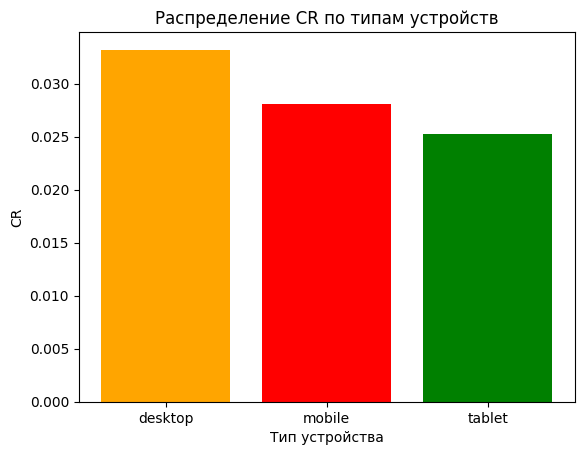

In [79]:
# Визуализирую данные
plt.bar(device['device_category'], device['CR'], color=['orange', 'red', 'green'])
plt.title('Распределение CR по типам устройств')
plt.xlabel('Тип устройства')
plt.ylabel('СR');

In [80]:
# Посчитаю конверсию для мобильных и десктопных устройств

mobile = df_all.loc[df_all['device_category'] == 'mobile']
desktop = df_all.loc[df_all['device_category'] == 'desktop']


In [81]:
mobile_count = mobile.groupby('visit_date', as_index=False)['target'].count()
mobile_sum = mobile.groupby('visit_date', as_index=False)['target'].sum()
mobile_all = mobile_sum.merge(mobile_count, on='visit_date')
mobile_all['CR'] = mobile_all['target_x']/mobile_all['target_y'] * 100
mobile_all

,visit_date,target_x,target_y,CR
0,2021-05-19,22,315,6.984127
1,2021-05-21,0,389,0.000000
2,2021-05-22,7,502,1.394422
3,2021-05-23,32,766,4.177546
4,2021-05-24,1513,23475,6.445154
...,...,...,...,...
221,2021-12-27,195,9558,2.040176
222,2021-12-28,220,10218,2.153063
223,2021-12-29,200,10622,1.882885
224,2021-12-30,158,10004,1.579368


In [82]:
desktop_count = desktop.groupby('visit_date', as_index=False)['target'].count()
desktop_sum = desktop.groupby('visit_date', as_index=False)['target'].sum()
desktop_all = desktop_sum.merge(desktop_count, on='visit_date')
desktop_all['CR'] = desktop_all['target_x']/desktop_all['target_y'] * 100
desktop_all

,visit_date,target_x,target_y,CR
0,2021-05-19,28,385,7.272727
1,2021-05-21,0,432,0.000000
2,2021-05-22,4,250,1.600000
3,2021-05-23,14,336,4.166667
4,2021-05-24,1001,15401,6.499578
...,...,...,...,...
221,2021-12-27,37,1511,2.448709
222,2021-12-28,19,1467,1.295160
223,2021-12-29,16,1615,0.990712
224,2021-12-30,9,2174,0.413983


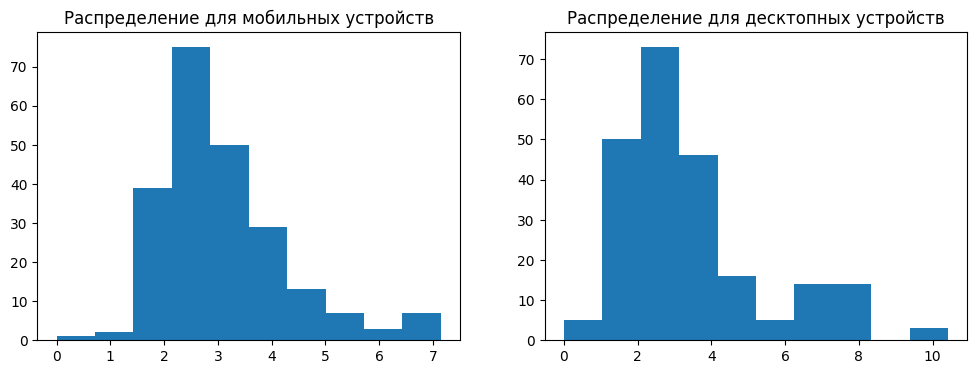

In [59]:
# Визуально видно различие конверсии. Проверю при помощи статистических тестов
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
axes[0].hist(mobile_all.CR) 
axes[1].hist(desktop_all.CR)
axes[0].set_title('Распределение для мобильных устройств')
axes[1].set_title('Распределение для десктопных устройств');

In [60]:
# нормальность распределения
stats.shapiro(mobile_all.CR)

ShapiroResult(statistic=0.9079796632354868, pvalue=1.3852877486351955e-10)

In [61]:
# нормальность распределения
stats.shapiro(desktop_all.CR)

ShapiroResult(statistic=0.8776527165808868, pvalue=1.5786245776299616e-12)

### По результатам теста Шапиро-Уилка данные не подчиняются закону нормального распределения (pvalue = 1.3852877486351955e-10, и 1.5786245776299616e-12 соответственно)
### Сравниваются количественные даннные, выборки не зависимы, количество групп - 2.
### Для проверки гипотезы нужно применить критерий Манна-Уитни

In [83]:

stats.mannwhitneyu(mobile_all.CR, desktop_all.CR)


MannwhitneyuResult(statistic=24680.5, pvalue=0.5371140349533376)

### По результатам теста pvalue=0.5371140349533376 т.к. превышен порог значимости в 5% нельзя отвергнуть нулевую гипотезу.
### несмотря на различия в данных CR, остаемся в рамках нулевойй гипотезы: "Трафик с мобильных устройств не отличается от трафика с десктопных устройств c точки зрения CR в целевые события"

### Гипотеза 3. 
### Нулевая гипотеза: "Трафик из городов присутствия (Москва и область, Санкт-Петеобург) не отличается от трафика из иных регионов с точки зрения CR"
### альтернативная гипотеза: ""Трафик с мобильных устройств ОТЛИЧАЕТСЯ от трафика с десктопных устройств c точки зрения CR в целевые события"

In [84]:
# Выведу количество значений по каждому городу
df_all['geo_city'].value_counts(dropna=False).head(15)

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
Kazan                27689
Samara               23433
Nizhny Novgorod      20782
Ufa                  20283
Novosibirsk          20115
Krasnoyarsk          15283
Chelyabinsk          14923
Tula                 14774
Rostov-on-Don        13064
Voronezh             12701
Name: count, dtype: int64

In [85]:
# Создам переменную 'target_cities', которая разделит все города на целевые и нет
target_cities = [
    "Moscow", "Saint Petersburg", "Aprelevka", "Balashikha", "Bronnitsy", "Vereya", "Vidnoye", "Volokolamsk", "Voskresensk",                   
"Vysokovsk", "Golitsyno", "Dzerzhinsky", "Dmitrov", "Dolgoprudny", "Domodedovo", "Drezna", "Dubna", "Yegoryevsk",                       
"Zhukovsky", "Zaraysk", "Zvenigorod", "Ivanteyevka", "Istra", "Kashira", "Klimovsk", "Klin", "Kolomna", "Korolyov",                       
"Kotelniki", "Krasnoarmeysk", "Krasnogorsk", "Krasnozavodsk", "Krasnoznamensk", "Kubinka", "Kurovskoye", "Likino-Dulyovo",                       
"Lobnya", "Losino-Petrovsky", "Lukhovitsy", "Lytkarino", "Lyubertsy", "Mozhaysk", "Mytishchi", "Naro-Fominsk", "Noginsk",                       
"Odintsovo", "Ozyory", "Orekhovo-Zuyevo", "Pavlovsky Posad", "Peresvet", "Podolsk", "Protvino", "Pushkino", "Pushchino",                       
"Ramenskoye", "Reutov", "Roshal", "Ruza", "Sergiyev Posad", "Serpukhov", "Solnechnogorsk", "Staraya Kupavna", "Stupino",                       
"Taldom", "Fryazino", "Khimki", "Khotkovo", "Chernogolovka", "Chekhov", "Shatura", "Shchelkovo", "Elektrogorsk", "Elektrostal",                       
"Elektrougli", "Yubileyny", "Yakhroma"]
df_all['target_cities'] = df_all.apply(lambda x: 'target_cities' if x.geo_city in target_cities else 'other', axis =1)

In [65]:
df_all.head()

,Unnamed: 0,session_id,target,car_brand,cars_model,client_id,visit_date,visit_time,visit_number,utm_source,...,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,trafic,target_cities
0,0,1000009318903347362.1632663668.1632663668,0,other,other,2.328328e+08,2021-09-26,2024-05-21 16:00:00,1.0,MvfHsxITijuriZxsqZqt,...,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,412x869,Chrome,Russia,Gelendzhik,other,other
1,1,1000010177899156286.1635013443.1635013443,0,other,other,2.328330e+08,2021-10-23,2024-05-21 21:24:03,1.0,fDLlAcSmythWSCVMvqvL,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x640,Samsung Internet,Russia,Voronezh,organic,other
2,2,1000013386240115915.1635402956.1635402956,0,other,vesta,2.328338e+08,2021-10-28,2024-05-21 09:35:56,1.0,ZpYIoDJMcFzVoPFsHGJL,...,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x846,Chrome,Russia,Cherkessk,other,other
3,3,1000017303238376207.1623489300.1623489300,0,other,other,2.328347e+08,2021-06-12,2024-05-21 12:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,...,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x780,Chrome,Russia,Irkutsk,other,other
4,4,1000020580299877109.1624943350.1624943350,0,other,other,2.328354e+08,2021-06-29,2024-05-21 08:00:00,1.0,fDLlAcSmythWSCVMvqvL,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow,organic,target_cities


In [97]:
df_all.target_cities.value_counts()

target_cities
target_cities    1121199
other             613411
Name: count, dtype: int64

In [88]:
# Выведу количество целевых действий для целевых и не целевых городов
print('Количество целевых действий для городов')
city = df_all.groupby(['target_cities'], as_index=False).agg({'target': 'mean'})
city = city.rename(columns={'target': 'CR'})
city

Количество целевых действий для городов


,target_cities,CR
0,other,0.028002
1,target_cities,0.029953


In [86]:
# Выведу те же значения в процентах. 
print('Процент целевых действий по городам: ')
target_percentage(df_all, 'target_cities')

Процент целевых действий по городам: 


,Количество объектов,Доля от общего числа в %,CR
target_cities,,,
target_cities,1121199,64.64%,3.00%
other,613411,35.36%,2.80%


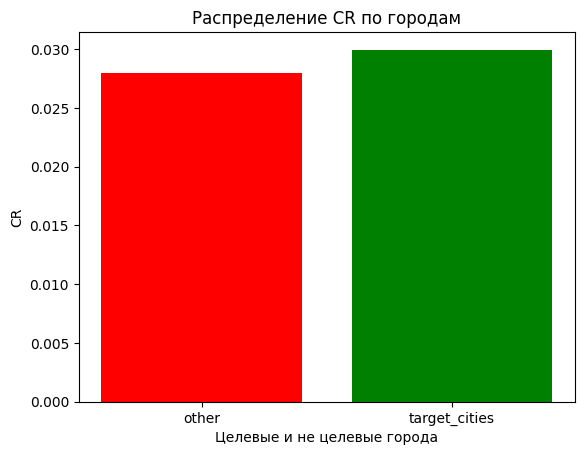

In [89]:
# Отображу значиния на графике. Разница между целевыми городами и нет составляет 0,3%
plt.bar(city['target_cities'], city['CR'], color=['red', 'green'])
plt.title('Распределение CR по городам')
plt.xlabel('Целевые и не целевые города')
plt.ylabel('СR');

In [90]:
# Посчитаю конверсию по visit_date для целевых и не целевых городов
target_cities = df_all.loc[df_all['target_cities'] == 'target_cities']
other = df_all.loc[df_all['target_cities'] == 'other']


In [91]:
target_count = target_cities.groupby('visit_date', as_index=False)['target'].count()
target_sum = target_cities.groupby('visit_date', as_index=False)['target'].sum()
target_all = target_sum.merge(target_count, on='visit_date')
target_all['CR'] = target_all['target_x']/target_all['target_y'] * 100
target_all

,visit_date,target_x,target_y,CR
0,2021-05-19,50,415,12.048193
1,2021-05-21,0,533,0.000000
2,2021-05-22,9,505,1.782178
3,2021-05-23,38,713,5.329593
4,2021-05-24,1726,26757,6.450648
...,...,...,...,...
221,2021-12-27,113,5719,1.975870
222,2021-12-28,123,6263,1.963915
223,2021-12-29,121,7002,1.728078
224,2021-12-30,86,7440,1.155914


In [92]:
other_count = other.groupby('visit_date', as_index=False)['target'].count()
other_sum = other.groupby('visit_date', as_index=False)['target'].sum()
other_all = other_sum.merge(other_count, on='visit_date')
other_all['CR'] = other_all['target_x']/other_all['target_y'] * 100
other_all

,visit_date,target_x,target_y,CR
0,2021-05-19,0,288,0.000000
1,2021-05-21,0,293,0.000000
2,2021-05-22,2,256,0.781250
3,2021-05-23,8,396,2.020202
4,2021-05-24,810,12473,6.494027
...,...,...,...,...
221,2021-12-27,120,5437,2.207100
222,2021-12-28,116,5510,2.105263
223,2021-12-29,98,5354,1.830407
224,2021-12-30,84,4858,1.729107


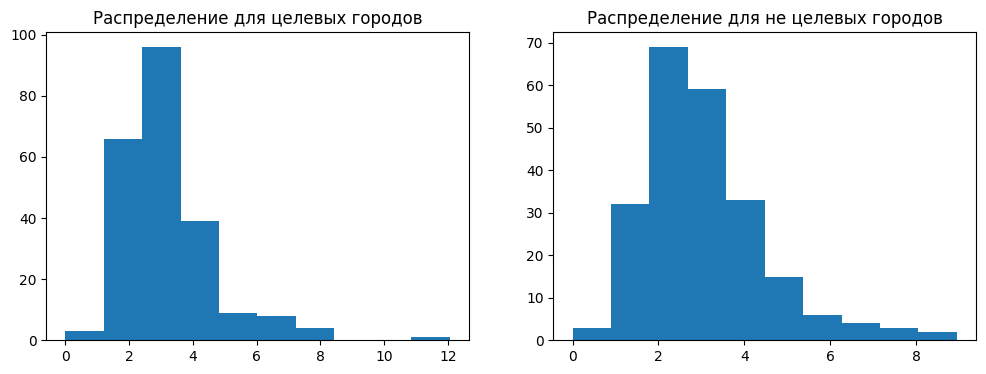

In [93]:
# Визуально видно различие конверсии. Проверю при помощи статистических тестов
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
axes[0].hist(target_all.CR) 
axes[1].hist(other_all.CR)
axes[0].set_title('Распределение для целевых городов')
axes[1].set_title('Распределение для не целевых городов');

In [94]:
stats.shapiro(target_all.CR)

ShapiroResult(statistic=0.8389558646862856, pvalue=1.4054786603596247e-14)

In [95]:
stats.shapiro(other_all.CR)

ShapiroResult(statistic=0.9062125270607659, pvalue=1.0412096247549142e-10)

### По результатам теста Шапиро-Уилка данные не подчиняются закону нормального распределения (pvalue = 1.4054786603596247e-14, и 1.0412096247549142e-10 соответственно)
### Сравниваются количественные даннные, выборки не зависимы, количество групп - 2.
### Для проверки гипотезы нужно применить критерий Манна-Уитни

In [96]:
# Применю Критерий Манна-Уитни
stats.mannwhitneyu(target_all.CR, other_all.CR)
# Значение p-value выше 5%, следовательно нельзя отклонить нулевую гипотезу. Трафик из целевых городов не отличается от трафика из других городов с точки зрения CR

MannwhitneyuResult(statistic=27423.0, pvalue=0.17473209240389143)

### По результатам теста pvalue=0.17473209240389143 т.к. превышен порог значимости в 5% нельзя отвергнуть нулевую гипотезу.
### несмотря на различия в данных CR, остаемся в рамках нулевойй гипотезы: "Трафик из городов присутствия (Москва и область, Санкт-Петеобург) 
### не отличается от трафика из иных регионов с точки зрения CR"

##### При проведении статистических тестов во всех трех случаях не подтвердилось "нормальное" распределение данных
##### в такой ситуации применяется критерий Манна-Уитни. 
##### несмотря на то, что данные по трафику с моюильных и десктопных устройств разнятся между собой 2,80% и 3,32% соответственно, статистический критегий говорит о том, что мы не можем отвергнуть 
##### нулеую гипотезу.
##### Та же ситуация касается трафика из городов присутствия:
##### Различия в данных есть. target_cities = 3%, other = 2,74%, однако проверка данных статистическим критерием говорит о не возможности отвергнуть нулевую гипотезу.
##### Предположу, что это произошло потому, что разниза в обоих случаях не значительна.

## Ответы на вопросы продуктовой команды

### Из каких имточников(кампаний/устройств/локаций) идет самый целевой трафик. С и с точки зрения объема и точки зрения CR

### Из каких рекламных кампаний?

In [77]:
# Данные по рекламным кампаниям содержатся в колонке 'utm_campaign'. Выведу количество уникальных значений
n_unique = df_all['utm_campaign'].nunique()
print(f'Количество уникальных значений в `utm_campaign` = {n_unique}')

Количество уникальных значений в `utm_campaign` = 406


In [78]:
#Выведу 10 наиболее часто встречающихся значений
compaign = df_all['utm_campaign'].value_counts(dropna=False)
compaign[: 10]

utm_campaign
LTuZkdKfxRGVceoWkVyg    618279
LEoPHuyFvzoNfnzGgfcd    321286
FTjNLDyTrXaWYgZymFkV    234950
gecBYcKZCPMcVYdSSzKP    133247
XHNUiSKKGTEpSAlaVMFQ     23750
sbJRYgVfvcnqKJNDDYIr     19942
okTXSMadDkjvntEHzIjp     18405
LwJZxKuWmvOhPsaCeRjG     16846
SgIUDYUKnyWHVowUOqid     15784
RoDitORHdzGfGhNCyEMy     15063
Name: count, dtype: int64

In [79]:
def replace_rare(data: pd.Series, tolerance: float = 0.01) -> pd.Series:
  """Заменяет в колонке редкие значения на 'rare_other'. Редкими считаются 
  значения, доля появления которых не превышает `tolerance`. Также заполняет 
   пропуски значением '(nan)'.
    """

  data = data.copy()

  value_counts = data.value_counts(dropna=False)
  rare_values = value_counts[value_counts < (len(data) * tolerance)]
  rare_values = rare_values.index.tolist()
    
  data[data.isin(rare_values)] = 'rare_other'
  return data.fillna('(nan)')

#print('Процент целевых действий для частых значений канала привлечения:')
df_all['utm_source_frequent'] = replace_rare(df_all.utm_source) # заполним пропуски и редкие значения 'rare_other' 
target_percentage(df_all, 'utm_source_frequent', 
                  index_name='Канал привлечения')

,Количество объектов,Доля от общего числа в %,CR
Канал привлечения,,,
aXQzDWsJuGXeBXexNHjc,29528,1.70%,6.19%
bByPQxmDaMXgpHeypKSM,90356,5.22%,6.15%
fDLlAcSmythWSCVMvqvL,277060,15.99%,3.80%
BHcvLfOaCWvWTykYqHVe,110963,6.41%,3.50%
QxAxdyPLuQMEcrdZWdWb,45267,2.61%,3.10%
ZpYIoDJMcFzVoPFsHGJL,552631,31.90%,2.90%
kjsLglQLzykiRbcDiGcD,245178,14.15%,2.57%
rare_other,111070,6.41%,1.72%
jaSOmLICuBzCFqHfBdRg,28288,1.63%,1.42%


In [80]:
print(f'Наиболее конвентируемые рекламные кампании:\nПроцент целевых действий для самых частых значений рекламной кампании:')
df_all['utm_campaign_frequent'] = replace_rare(df_all['utm_campaign'], 0.01)
target_percentage(df_all, 'utm_campaign_frequent', 
                  index_name='Рекламная кампания')


Наиболее конвентируемые рекламные кампании:
Процент целевых действий для самых частых значений рекламной кампании:


,Количество объектов,Доля от общего числа в %,CR
Рекламная кампания,,,
LTuZkdKfxRGVceoWkVyg,618279,35.69%,4.23%
gecBYcKZCPMcVYdSSzKP,133247,7.69%,3.41%
LEoPHuyFvzoNfnzGgfcd,321286,18.55%,2.91%
sbJRYgVfvcnqKJNDDYIr,19942,1.15%,2.88%
rare_other,362407,20.92%,1.86%
XHNUiSKKGTEpSAlaVMFQ,23750,1.37%,1.69%
FTjNLDyTrXaWYgZymFkV,234950,13.56%,1.04%
okTXSMadDkjvntEHzIjp,18405,1.06%,0.42%


### С каких устройств?

In [81]:
# Данные по устройствам содержатся в колонке 'device_category'. Выведу количество уникальных значений
n_unique = df_all['device_category'].nunique()
print(f'Количество уникальных значений в `device_category` = {n_unique}')

Количество уникальных значений в `device_category` = 3


In [82]:
# Всего уникальных значений 3. Выведу частоту
df_all['device_category'].value_counts(dropna=False).head(10)

device_category
mobile     1368679
desktop     346891
tablet       16696
Name: count, dtype: int64

In [83]:
# Выведу процент целевых действий
print('Процент целевых действий по категориям устройств: ')
target_percentage(df_all, 'device_category')

Процент целевых действий по категориям устройств: 


,Количество объектов,Доля от общего числа в %,CR
device_category,,,
desktop,346891,20.03%,3.32%
mobile,1368679,79.01%,2.80%
tablet,16696,0.96%,2.53%


In [84]:
device= df_all.groupby(['device_category'], as_index=False).agg({'target' : 'mean'})
device= device.rename(columns={'target':'CR'})
device

,device_category,CR
0,desktop,0.033189
1,mobile,0.028041
2,tablet,0.025276


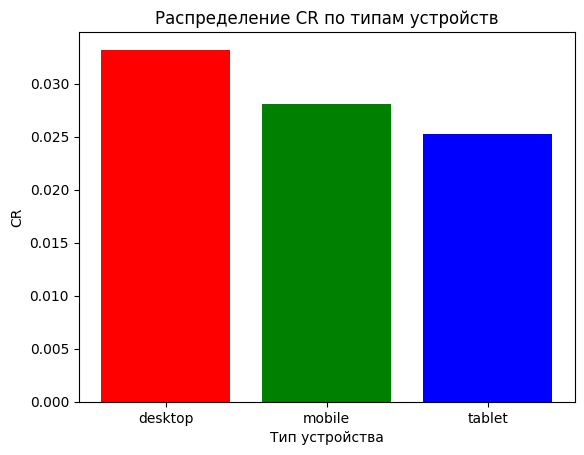

In [85]:
plt.bar(device['device_category'], device['CR'], color=['red', 'green', 'blue'])
plt.title('Распределение CR по типам устройств')
plt.xlabel('Тип устройства')
plt.ylabel('СR');

In [86]:
df_all['device_brand'].value_counts(dropna=False).head(10)

device_brand
Apple        503533
other        347196
Samsung      311641
Xiaomi       269251
Huawei       173828
Realme        17926
(not set)     16392
OPPO          12775
Vivo          11026
OnePlus        9322
Name: count, dtype: int64

In [87]:
print('Процент целевых действий для частых значений марки устройства:')
df_all['device_brand_frequent'] = replace_rare(df_all['device_brand'])
target_percentage(df_all, 'device_brand_frequent', 
                  index_name='Марка устройства')

Процент целевых действий для частых значений марки устройства:


,Количество объектов,Доля от общего числа в %,CR
Марка устройства,,,
other,347196,20.04%,3.32%
Samsung,311641,17.99%,3.23%
Apple,503533,29.07%,2.87%
Huawei,173828,10.03%,2.60%
rare_other,108891,6.29%,2.52%
Xiaomi,269251,15.54%,2.45%
Realme,17926,1.03%,2.35%


### Чаще всего пользователи посещают сайт с мобильных устройств (79%), однако, больше целевых действий совершается с компьютера. 
### Предположу что это связано с тем, что не вполне удобно пользоваться сервисом через мобильное приложение.
### Возможно мобильное приложении или мобильную версию сайта необходимо доработать.


### Из каких регионов? 

In [88]:
# Информация о странах пользователей содержится в колонке "geo_country"
# Выведу топ-10 наиболее часто встречающихся стран
df_all['geo_country'].value_counts(dropna=False).head(10)

geo_country
Russia           1682423
Ukraine             8455
United States       8141
Belarus             3432
Kazakhstan          2109
Germany             2085
Ireland             1989
Turkey              1787
Sweden              1731
Netherlands         1451
Name: count, dtype: int64

In [89]:
# Выведу 10 самых популярных городов по количеству пользователей
df_all['geo_city'].value_counts(dropna=False).head(10)

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
Kazan                27689
Samara               23433
Nizhny Novgorod      20782
Ufa                  20283
Novosibirsk          20115
Name: count, dtype: int64

In [90]:
# Самые популятные города по конверсии
print('Процент целевых действий для городов:')
df_all['geo_city_frequent'] = replace_rare(df_all['geo_city'])
target_percentage(df_all, 'geo_city_frequent', 
                  index_name='Город')

Процент целевых действий для городов:


,Количество объектов,Доля от общего числа в %,CR
Город,,,
Kazan,27689,1.60%,4.11%
Krasnodar,30260,1.75%,3.57%
Ufa,20283,1.17%,3.15%
Moscow,750928,43.35%,3.15%
Samara,23433,1.35%,3.10%
rare_other,453522,26.18%,2.74%
Nizhny Novgorod,20782,1.20%,2.69%
Yekaterinburg,33555,1.94%,2.64%
Saint Petersburg,278402,16.07%,2.55%


### Какие авто пользуются наибольшим спросом?

In [91]:
df_all['car_brand'].value_counts(dropna=False).head(10)

car_brand
other            1527094
skoda              70327
volkswagen         51546
toyota             15917
renault            15209
mercedes-benz      14277
lada-vaz            7700
volvo               7011
porsche             6866
nissan              5246
Name: count, dtype: int64

In [92]:
print('Процент целевых действий для марки фвто:')
df_all['car_brand_frequent'] = replace_rare(df_all['car_brand'])
target_percentage(df_all, 'car_brand_frequent', 
                  index_name='Марка авто')

Процент целевых действий для марки фвто:


,Количество объектов,Доля от общего числа в %,CR
Марка авто,,,
volkswagen,51546,2.98%,7.51%
skoda,70327,4.06%,5.45%
rare_other,83299,4.81%,3.25%
other,1527094,88.16%,2.61%


In [93]:
df_all['cars_model'].value_counts(dropna=False).head(10)

cars_model
other       1499839
vesta         48367
rapid         44253
polo          24341
qashqai       13927
x-trail       11345
rio            8182
e-klasse       8175
tiguan         6556
seltos         6278
Name: count, dtype: int64

In [94]:
print('Процент целевых действий для модели авто:')
df_all['cars_model_frequent'] = replace_rare(df_all['cars_model'])
target_percentage(df_all, 'cars_model_frequent', 
                  index_name='Модель авто')

Процент целевых действий для модели авто:


,Количество объектов,Доля от общего числа в %,CR
Модель авто,,,
vesta,48367,2.79%,6.79%
polo,24341,1.41%,6.57%
rapid,44253,2.55%,6.49%
rare_other,115466,6.67%,3.85%
other,1499839,86.58%,2.54%


### Стоит ли увеличивать присутствие в социальных сетях?

In [95]:
# Даннные по каналам привлечения находятся в "utm_source"
social_network = [
   'QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm'
 
]

In [96]:
# Создам признак в котором будут содержаться данные о канале привлечения. Социальные сети или другое
df_all['social_media'] = df_all.apply(lambda x: 'social_media' if x.utm_source in social_network else 'other', axis =1)

In [97]:
# Выведу количество значений для каждого канала
df_all['social_media'].value_counts(dropna=False).head(10)

social_media
other           1475986
social_media     256280
Name: count, dtype: int64

In [98]:
# Выведу % целевых действий
print('Процент целевых действий для рекламы из соцсетей:')
df_all['social_media_frequent'] = replace_rare(df_all['social_media'])
target_percentage(df_all, 'social_media_frequent', 
                  index_name='Тип рекламы')

Процент целевых действий для рекламы из соцсетей:


,Количество объектов,Доля от общего числа в %,CR
Тип рекламы,,,
other,1475986,85.21%,3.14%
social_media,256280,14.79%,1.57%


## Выводы
> СберАвтоподписка - новый продукт для нашего рынка, потому клиенты его тщательно изучают.
> только 2,93% сессий завершилось целевым действием.
> Самое распространенное целевое действие - 'sub_car_claim_click'. Пользьзователи совершили его 37 928 раз
> Несмотря на то, что пользователей через органический трафик приходит меньше (27,03% - органический,  72,97% - платный)
> Органический трафиек приносит больше пользователей, совершающих целевое действие (4,44% - органический, 2,37% - платный)
> Чаще всего пользователи посещают сайт с мобильных устройств - 78,90%.
> Однако наибольшее количество целевых действий совершено с компьютера (3,32%)
> Возможно это связано с тем, что мобильная версия сайта не достаточна удобна для использования
> Рекламные кампании, привлекшие наибольшее количество посетителей:
>>> LTuZkdKfxRGVceoWkVyg - 618279
>>> LEoPHuyFvzoNfnzGgfcd - 321286
>>> FTjNLDyTrXaWYgZymFkV - 234950
> Наибольшее количество пользователей совершивших целевое действие проживают в Москве, МО и Санкт-Петербурге. Конверсия по этим регионам - 3,00%
> Наибольшее количество посетителей сайта проживают на территории РФ - 1 682 423
> В городаж:
>>> Москва - 750928
>>> Санкт-Петербург - 278402
>>> Екатеринбург - 33555
> Больше всего целевых действий совершили пользователи городов:
>>> Казань - 4,11%
>>> Краснодар - 3,57%
>>> Уфа - 3,15%
> Самые популярные марки с точки зрения количества пользователей skoda, volkswagen, toyota 
> Самая высокая конверсия -  volkswagen = 7,51%
> Cамыми популярными моделями с точки зрения конверсии являются vesta, polo, rapid
> Не смотря на то, что пользователей из соц сетей пришло менее 15% показатель конверсии составляет 1,57%. то есть болшее количество пользователей совершают целевое действие.
> Считаю, что присутствие в соцсетях нужно увеличивать  